## Bandas e Modos de uma imagem

Uma imagem pode consistir em uma ou mais bandas de dados. A Python Imaging Library permite armazenar várias bandas em uma única imagem, desde que todas tenham as mesmas dimensões e profundidade. Por exemplo, uma imagem PNG pode ter bandas 'R', 'G', 'B' e 'A' para os valores de transparência vermelho, verde, azul e alfa. Muitas operações atuam em cada banda separadamente, por exemplo, histogramas. Muitas vezes é útil pensar em cada pixel como tendo um valor por banda.

Para obter o número e os nomes das bandas em uma imagem, usa-se o método **getbands()**.

O modo(mode) de uma imagem é uma string que define o tipo e a profundidade de um pixel na imagem. Cada pixel usa toda a gama de profundidade de bits. Assim, um pixel de 1 bit tem um alcance de 0-1, um pixel de 8 bits tem um alcance de 0-255, um pixel inteiro de 32 sinais tem um alcance de INT32 e um pixel de ponto flutuante de 32 bits tem um alcance de FLOAT32.
A versão atual suporta os seguintes modos padrão:

- 1(pixels de 1 bit, preto e branco, armazenados com um pixel por byte)

- L(pixels de 8 bits, escala de cinza)

- P(pixels de 8 bits, mapeados para qualquer outro modo usando uma paleta de cores)

- RGB(pixels de 3x8 bits, cor verdadeira)

- RGBA(pixels de 4x8 bits, cor verdadeira com máscara de transparência)

- CMYK(pixels de 4x8 bits, separação de cores)

- YCbCr(pixels de 3x8 bits, formato de vídeo colorido)

Observe que isso se refere ao JPEG, e não ao padrão ITU-R BT.2020

- LAB(pixels de 3x8 bits, o espaço de cor L*a*b)

- HSV(pixels de 3x8 bits, Hue, Saturation, Value color space)

A faixa de Hue de 0-255 é uma versão em escala de 0 graus <= Hue < 360 graus
> No espaço de cores "Hue", o valor do componente de cor "Hue" representa a tonalidade da cor em um círculo de cores. A faixa de valores de 0 a 255 corresponde a um ângulo de 0 a 360 graus no círculo de cores, onde cada valor de "Hue" é mapeado para um ângulo correspondente.
- I(pixels inteiros assinados de 32 bits)

- F(pixels de ponto flutuante de 32 bits)


Podemos ler o modo de uma imagem através do atributo `mode`.

#### $\color{red}{\text{OBS: A biblioteca Matplotlib apenas foi usada para exibição das imagens no Notebook para melhor entendiment visual da biblioteca PIL e suas funções}}$

Também podemos descobrir quantas bandas existem em um objeto Image usando o **.getbands()** e podemos converter entre os modos usando **.convert()**

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("mamao.jpg")

cmyk_img = img.convert("CMYK")
gray_img = img.convert("L")  # Escala cinza

cmyk_img.show()
gray_img.show()

img.getbands()

cmyk_img.getbands()

gray_img.getbands()

('L',)

In [17]:
img.getbands()

('R', 'G', 'B')

In [18]:
cmyk_img.getbands()

('C', 'M', 'Y', 'K')

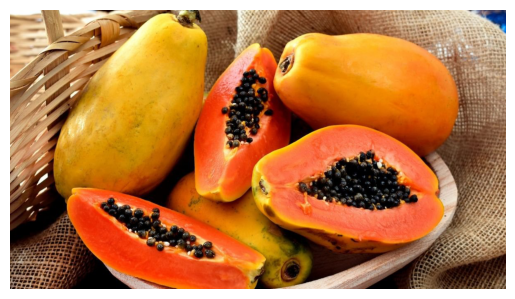

In [6]:
import matplotlib.pyplot as plt
plt.imshow(cmyk_img)
plt.axis('off')
plt.show()

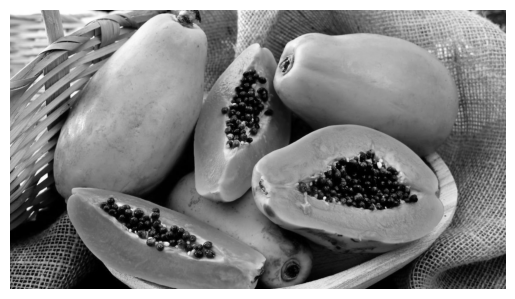

In [30]:
gray_img_normalized = gray_img.convert("F") ## Normalizar os valores dos pixels para o intervalo entre 0 e 1
plt.imshow(gray_img_normalized) # plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.show()

Podemos separar uma imagem em suas bandas usando **.split()**, por exemplo, dividir uma imagem “RGB” cria três novas imagens, cada uma contendo uma cópia de uma das bandas originais (vermelho, verde, azul).. e combinar bandas separadas de volta em um objeto Imagee usando **.merge()**.. Quando você usa **.split()**., o método retorna todas as bandas como objetos Image separados

In [4]:
red, green, blue = img.split()
red.mode

'L'

O modo do objeto que **.split()** retorna é 'L', indicando que se trata de uma imagem em tons de cinza ou uma imagem que exibe apenas os valores de luminância de cada pixel.

Também podemos criar três novas imagens RGB mostrando os canais vermelho, verde e azul separadamente usando **merge()**.

- zeroed_band = red.point(lambda _: 0): Aqui, uma nova banda é criada chamada zeroed_band a partir da banda vermelha original (red). O método .point() é utilizado para mapear cada ponto da banda original para o valor zero. Isso significa que a nova banda resultante terá zeros em todos os lugares.

- red_merge = Image.merge("RGB", (red, zeroed_band, zeroed_band)): Nesta linha, a função .merge() é utilizada para criar uma nova imagem chamada red_merge. A imagem resultante será do modo RGB e será composta pela banda vermelha original (red), a banda zeroed_band no canal verde e a banda zeroed_band no canal azul. Isso significa que a imagem red_merge terá valores diferentes de zero apenas no canal vermelho.

- green_merge = Image.merge("RGB", (zeroed_band, green, zeroed_band)): Similarmente à linha anterior, esta linha cria uma nova imagem chamada green_merge. A imagem resultante também será do modo RGB e será composta pela banda zeroed_band no canal vermelho, a banda verde original (green) no canal verde e a banda zeroed_band no canal azul. Portanto, a imagem green_merge terá valores diferentes de zero apenas no canal verde.

- blue_merge = Image.merge("RGB", (zeroed_band, zeroed_band, blue)): Mais uma vez, uma nova imagem chamada blue_merge é criada. A imagem resultante é do modo RGB e é composta pela banda zeroed_band no canal vermelho, a banda zeroed_band no canal verde e a banda azul original (blue) no canal azul. Isso significa que a imagem blue_merge terá valores diferentes de zero apenas no canal azul.



In [5]:
zeroed_band = red.point(lambda _: 0)

red_merge = Image.merge(
    "RGB", (red, zeroed_band, zeroed_band)
)

green_merge = Image.merge(
    "RGB", (zeroed_band, green, zeroed_band)
)

blue_merge = Image.merge(
    "RGB", (zeroed_band, zeroed_band, blue)
)

red_merge.show()
green_merge.show()
blue_merge.show()

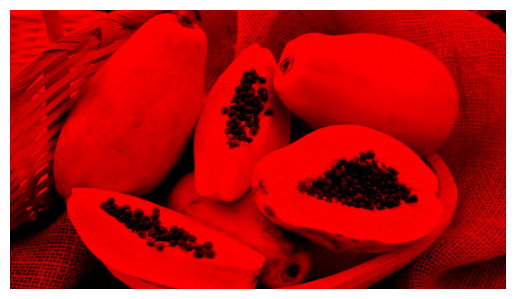

In [7]:
plt.imshow(red_merge)
plt.axis('off')
plt.show()

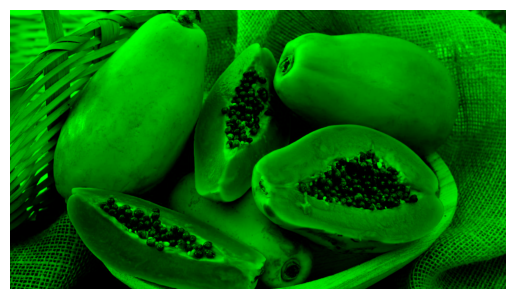

In [8]:
plt.imshow(green_merge)
plt.axis('off')
plt.show()

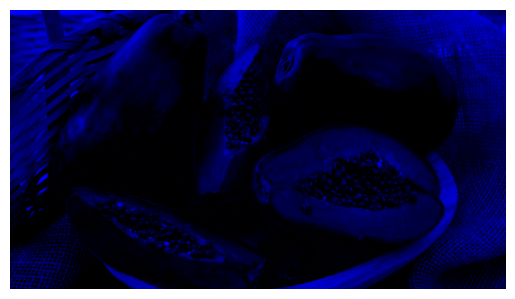

In [9]:
plt.imshow(blue_merge)
plt.axis('off')
plt.show()

#### Para mais especifícações:
###### [Conceitos](https://pillow.readthedocs.io/en/stable/handbook/concepts.html)

###### [Bands and Modes of an Image in the Python Pillow Library](https://realpython.com/image-processing-with-the-python-pillow-library/)